In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.getcwd()

#change working directory
os.chdir('F:\\FISH')
os.getcwd()

'F:\\FISH'

In [13]:
colnames = ['Chromosome', 'Start', 'End', 'Name', '20nt hits', 'Align', 'Chromosome targets', 'Sequence', 'Tm']
path = "/FISH/MYC_SE_R/MYC_SE_R_hg38.csv"
df = pd.read_csv(path, names=colnames, sep=';', header=None)
df

,Chromosome,Start,End,Name,20nt hits,Align,Chromosome targets,Sequence,Tm
0,chr8,129564095,129564135,MYC_SE_R_1,1,40,chr8,AAATCTGGTGCCAGGTGTGGTTATTGATACTGGATGACAT,70.970446
1,chr8,129564137,129564177,MYC_SE_R_2,2,"40,20","chr8,chrX",GAAAGCAGCCAGTTCTACAAGAACTCTTGATTTTACAAAG,67.558082
2,chr8,129564347,129564387,MYC_SE_R_7,1,40,chr8,CTCGTGGCTCTAGTGTATTCAGTATATTTTAATTTGCTAT,64.912654
3,chr8,129564389,129564429,MYC_SE_R_8,1,40,chr8,GAGGTTTTGTTTCTGGCTTTCTCTTTTTTGAGTCATTATG,66.788739
4,chr8,129564431,129564471,MYC_SE_R_9,1,40,chr8,GGGAGAAATTGTTTTTAAGAATCATTCCAAATGGTGACAA,66.546311
...,...,...,...,...,...,...,...,...,...
64,chr8,129568673,129568713,MYC_SE_R_110,1,40,chr8,AGTATTATTATTTAACATTTTTTAAGCACTTTTGATGGAC,61.637969
65,chr8,129568799,129568839,MYC_SE_R_113,1,40,chr8,TAAGCTCTTATCCATTTTTTCAAGGAGCTTCTTCTTCCCC,68.863746
66,chr8,129568925,129568965,MYC_SE_R_116,1,40,chr8,TTTATATGTGTTATCCAGTGGTATACTTACCTTCATGTTG,64.698584
67,chr8,129568967,129569007,MYC_SE_R_117,2,"40,27","chr8,chrX",CTTTAACATGACTTACTGCAGGCTAGATACTGTGCTAAGT,68.362177


In [14]:
df['Tm'].dtype

dtype('float64')

In [15]:
#load data CTRL_L PaintSHOP
path2 = "/FISH/MYC_SE_R/MYC_PaintShop_10kb.txt"
colnames2 = ["Chromosome", "Start", "End", "Sequence", "Tm", "On Target", "Off Target", "Repeat Seq", 
             "Prob", "Max Kmer", "Probe Strand", "Target"]
df_2 = pd.read_table(path2, names = colnames2, sep='\t')
df_2

,Chromosome,Start,End,Sequence,Tm,On Target,Off Target,Repeat Seq,Prob,Max Kmer,Probe Strand,Target
0,chr8,129554341,129554370,GGTCTCAGTCCCCTTCCCATTGGCTGTTCT,43.06,100.000,0,0,0.412,2,+,chr8_129554054-129579054
1,chr8,129554378,129554414,AATAAGATGAGAGTAGCGTCCATCTAAGAGGGAGGGC,42.48,100.000,0,0,0.214,0,+,chr8_129554054-129579054
2,chr8,129554415,129554448,TTTCCCTGACCTCATGTCTCAATCTGAGAGGCAC,42.33,97.986,0,0,0.169,2,+,chr8_129554054-129579054
3,chr8,129554527,129554563,AAAATGCCCATTTCCTTCTCCTCTATCACACAAGCCT,42.55,100.000,0,0,0.312,3,+,chr8_129554054-129579054
4,chr8,129554626,129554662,TTTCTTCTTGTTGGGAAATTCGGGGAGGAGATTACCA,42.16,99.876,0,0,0.262,0,+,chr8_129554054-129579054
...,...,...,...,...,...,...,...,...,...,...,...,...
103,chr8,129576160,129576196,TTTCTTCCTGTGGTGTGACTCTGCCATTTATTTGGGG,43.05,100.000,0,0,0.383,2,+,chr8_129554054-129579054
104,chr8,129576432,129576467,ACAAGGGTGGAGTTCCATTCATGATTGCATGGAAAA,42.01,100.000,0,0,0.123,2,+,chr8_129554054-129579054
105,chr8,129576815,129576851,ACCCCTGTAATCTCCGGTATTGATTGAGGTGTCATCT,42.66,100.000,0,0,0.292,2,+,chr8_129554054-129579054
106,chr8,129576852,129576881,TCCTGCAATGATGCCACATCCCCAAATCCA,42.30,97.223,0,0,0.319,2,+,chr8_129554054-129579054


In [16]:
start_min = df['Start'].min()
end_max = df['End'].max()
offset = 4450
df_2_filt = df_2[(df_2["Start"]>=start_min-offset) & (df_2["End"]<=end_max+offset)]

df_2_filt.reset_index(drop=True)

,Chromosome,Start,End,Sequence,Tm,On Target,Off Target,Repeat Seq,Prob,Max Kmer,Probe Strand,Target
0,chr8,129559981,129560016,AGCTGTTCACTCACAGAATGTTGCACATACTTCTGC,42.04,98.316,0,0,0.102,2,+,chr8_129554054-129579054
1,chr8,129560017,129560053,AGGGTCAAAAGAAATAAGCGAGGACAGTCCAAAGAGT,42.19,100.000,0,0,0.262,2,+,chr8_129554054-129579054
2,chr8,129560178,129560214,AACTAACCAGGTAAGTAGGGAGCCTAGGTAGAATGCC,42.49,100.000,0,0,0.185,0,+,chr8_129554054-129579054
3,chr8,129560215,129560248,CTGAGTTGGGAGGATGAGCTCAGAGTAGTGAGGC,43.43,98.100,0,0,0.341,4,+,chr8_129554054-129579054
4,chr8,129560249,129560284,ACTCACCCATTGAAACAAAGGCAAGCATAACCTTCC,42.40,100.000,0,0,0.139,2,+,chr8_129554054-129579054
...,...,...,...,...,...,...,...,...,...,...,...,...
64,chr8,129572243,129572279,TGTTCACATCTATTTCTCCAGTACCCTCTGTCTCGGA,42.15,100.000,0,0,0.273,2,+,chr8_129554054-129579054
65,chr8,129572329,129572365,CTAGTCACTTCTTCTCATGGGTCAGAAAACTGAGGCC,42.32,99.640,0,0,0.264,2,+,chr8_129554054-129579054
66,chr8,129573125,129573156,TCCGCTGTACTCAGGACCTAAGGGTTTGAGTG,42.24,99.605,0,0,0.215,0,+,chr8_129554054-129579054
67,chr8,129573163,129573199,CTGTCTTTCAAATGCAATCCTCTCCAAAAGAGCCACC,42.41,100.000,0,0,0.198,0,+,chr8_129554054-129579054


In [17]:
df_2_filt["Length"] = df_2_filt['Sequence'].apply(len)
df["Length"] = df['Sequence'].apply(len)

C:\Users\User\AppData\Local\Temp\ipykernel_10128\744933659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_filt["Length"] = df_2_filt['Sequence'].apply(len)


In [18]:
from Bio.SeqUtils import GC
from Bio.SeqUtils import MeltingTemp as mt

def corrected_tm(seq):
    tm = mt.Tm_NN(seq, Na=390)
    tm_corr = mt.chem_correction(tm, fmd=50)
    return tm_corr

In [19]:
df["Tm"] = df['Sequence'].apply(corrected_tm)
df["GC"] = df['Sequence'].apply(GC)
df_2_filt["GC"] = df_2_filt['Sequence'].apply(GC)

C:\Users\User\AppData\Local\Temp\ipykernel_10128\4231887989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_filt["GC"] = df_2_filt['Sequence'].apply(GC)


In [20]:
df['source']='Altius'
df_2_filt['source']='PaintSHOP'

C:\Users\User\AppData\Local\Temp\ipykernel_10128\3332657246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_filt['source']='PaintSHOP'


In [21]:
df_stack=pd.concat([df, df_2_filt], axis=0).reset_index()

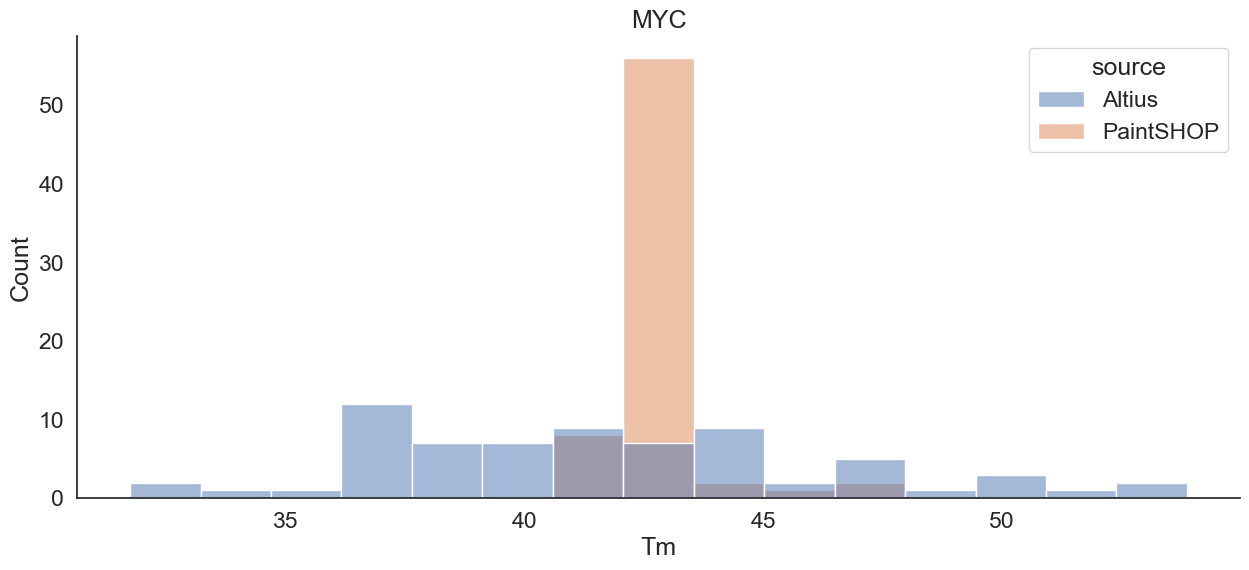

In [26]:
plt.figure(figsize = (15,6))
sns.set(font_scale=1.5)
sns.set_style("white")
hist=sns.histplot(data=df_stack, x="Tm", hue='source', bins=15)
hist.set_title('MYC')
sns.despine()
plt.show()

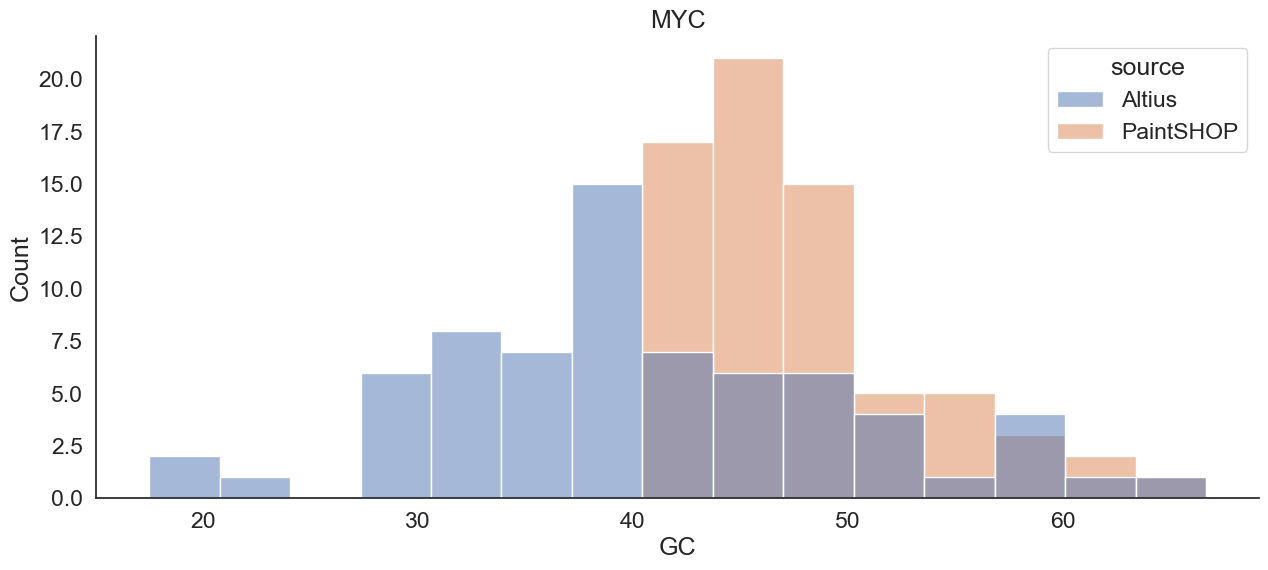

In [25]:
plt.figure(figsize = (15,6))
sns.set(font_scale=1.5)
sns.set_style("white")
hist=sns.histplot(data=df_stack, x="GC", hue='source', bins=15)
hist.set_title('MYC')
sns.despine()
plt.show()

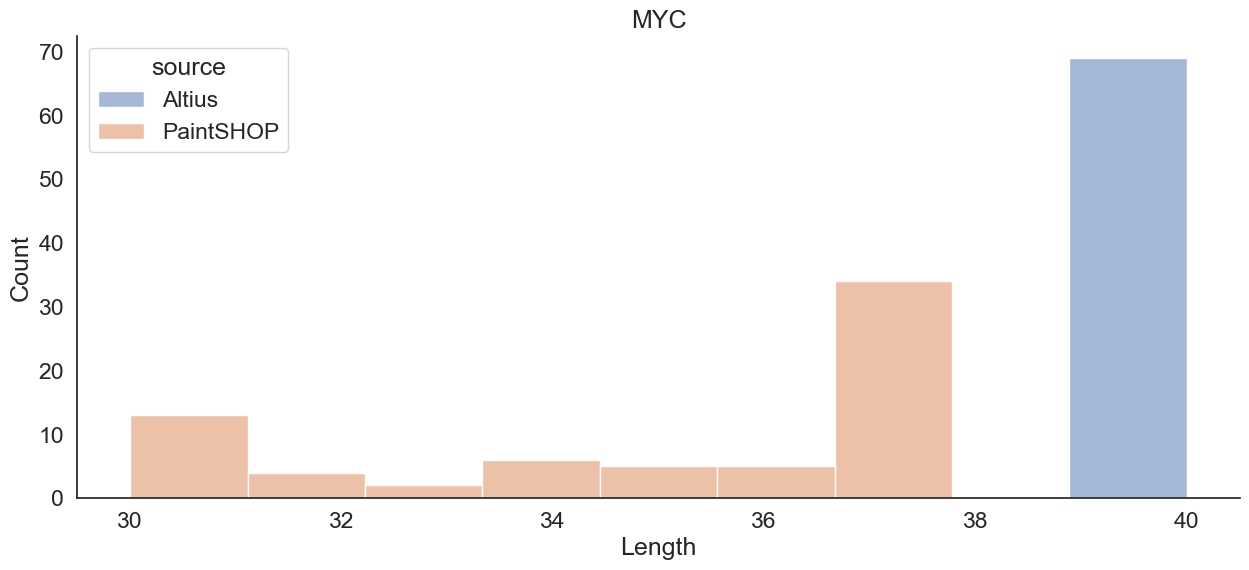

In [24]:
plt.figure(figsize = (15,6))
sns.set(font_scale=1.5)
sns.set_style("white")
hist=sns.histplot(data=df_stack, x="Length", hue='source')
hist.set_title('MYC')
sns.despine()
plt.show()